In [1]:
import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
# Read soil images
img_list = glob.glob("..\\..\\..\\data\\BGR_mini\\Profilbilder_no_ruler_mini\\*.JPG")

In [72]:
def remove_sky(img_path, thresh=250, closing_kernel_size=30):
    """thresh should be chosen fairly high (close to white)
    """

    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Blur the gray image (to smoothen out further isolated white regions not belonging to the sky)
    img_blur = cv2.GaussianBlur(gray, (15,15), 20)

    # Separate sky background (marked black) from soil (marked white)
    _, thresh_img = cv2.threshold(img_blur, thresh, 255, cv2.THRESH_BINARY_INV)

    # Apply morphological closing to remove small noise
    kernel = np.ones((closing_kernel_size, closing_kernel_size), np.uint8)
    closed_mask = cv2.morphologyEx(thresh_img, cv2.MORPH_CLOSE, kernel)

    # Find the indices of the sky pixels (black)
    sky_indices = np.where(closed_mask == 0)

    # If there are at least 10k black pixels left after closing, then accept them as sky background and crop
    if len(sky_indices[0] > 10**4): 
    
        # Find the maximum y-coordinate (row index) of the sky pixels
        lower_bound = np.max(sky_indices[0])
        return img[lower_bound:, :]
    else:
        return img

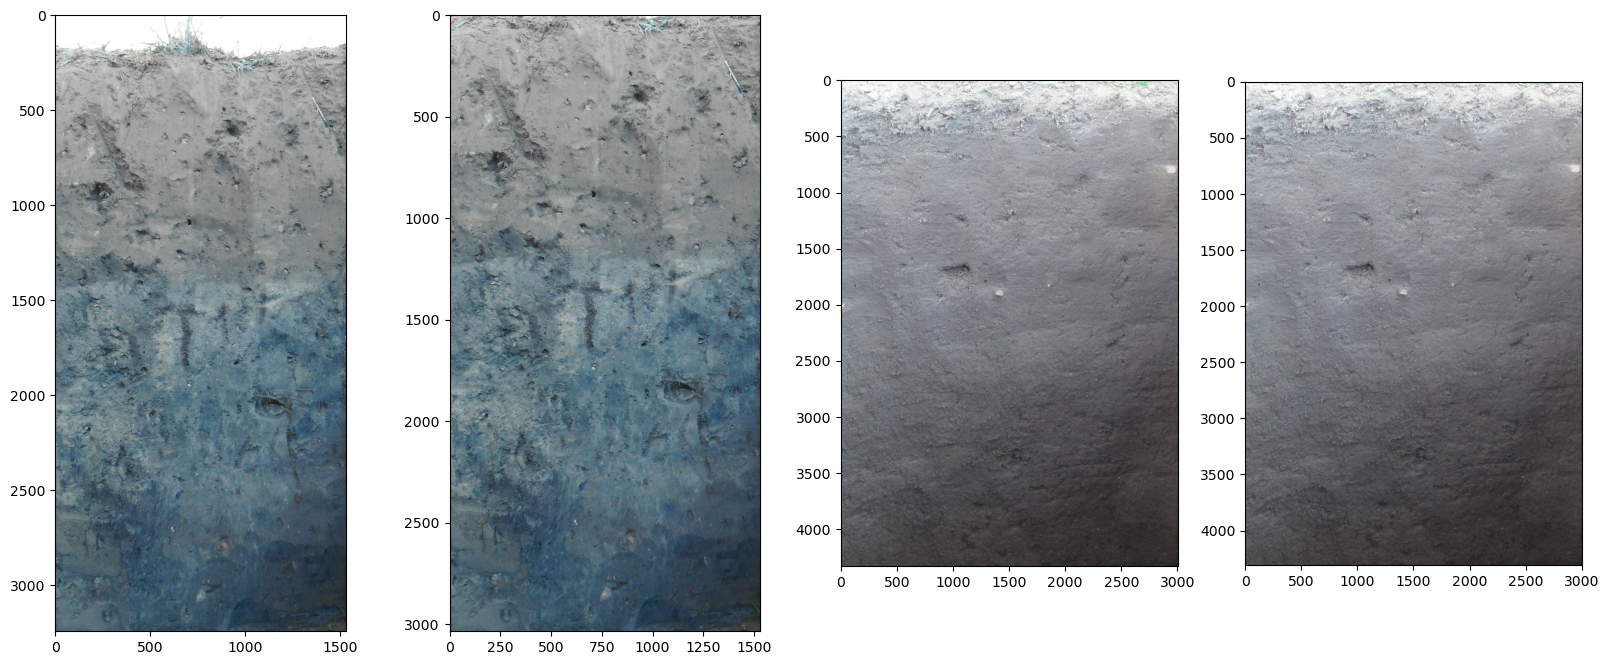

In [74]:
ind1, ind2 = 0, 11
img_no_sky_1 = remove_sky(img_list[ind1]) # example where sky needs to be removed
img_no_sky_2 = remove_sky(img_list[ind2]) # example where there is no sky to remove

plt.figure(figsize=(20,8))
plt.subplot(141)
plt.imshow(cv2.imread(img_list[ind1]))
plt.subplot(142)
plt.imshow(img_no_sky_1)
plt.subplot(143)
plt.imshow(cv2.imread(img_list[ind2]))
plt.subplot(144)
plt.imshow(img_no_sky_2)
plt.show()

In [76]:
# Remove sky backgrouns from all images and save new instances
for img_file in img_list:

    img_no_sky = remove_sky(img_file)
    img_file_no_sky = img_file.replace('Profilbilder_no_ruler_mini', 'Profilbilder_no_ruler_mini_no_sky')
    cv2.imwrite(img_file_no_sky, img_no_sky)

**Note:** You may need to crop a couple of fotos yourself, if the sky was too gray :)